In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

# Q1. Company Data

In [2]:
comp= pd.read_csv('Company_Data.csv')

In [3]:
comp1=comp.copy()

In [4]:
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
comp1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
comp1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
comp1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
comp.shape

(400, 11)

## outlier check

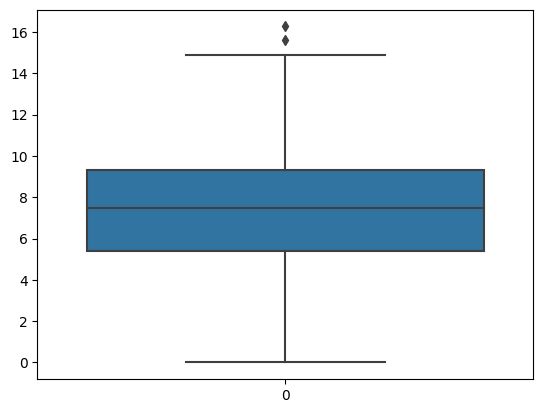

In [9]:
ax=sns.boxplot(comp1['Sales'])

## the data has 2 outlier instances

In [10]:
plt.rcParams["figure.figsize"]=9,5

skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


C:\Users\91832\AppData\Local\Temp\ipykernel_13628\2277292249.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(comp1['Sales'],shade=True,color='teal')


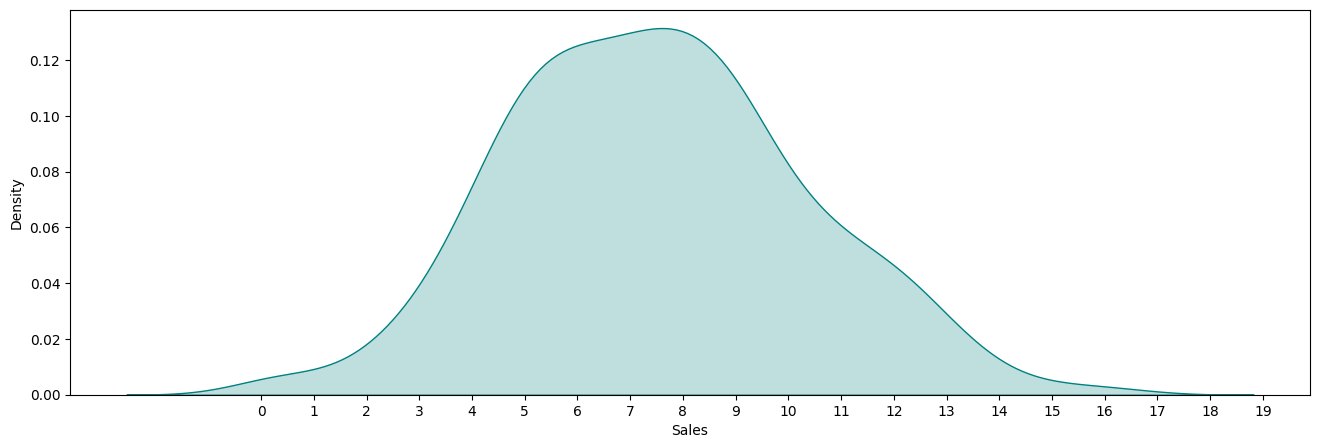

In [11]:
plt.figure(figsize=(16,5))
print("skew: {}".format(comp1['Sales'].skew()))
print("Kurtosis: {}".format(comp1['Sales'].kurtosis()))
ax=sns.kdeplot(comp1['Sales'],shade=True,color='teal')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## (1)The data is skwed on the right,
## (2)The data has negative kurtosis

In [12]:
colu=comp1.select_dtypes(include='object').columns.tolist()

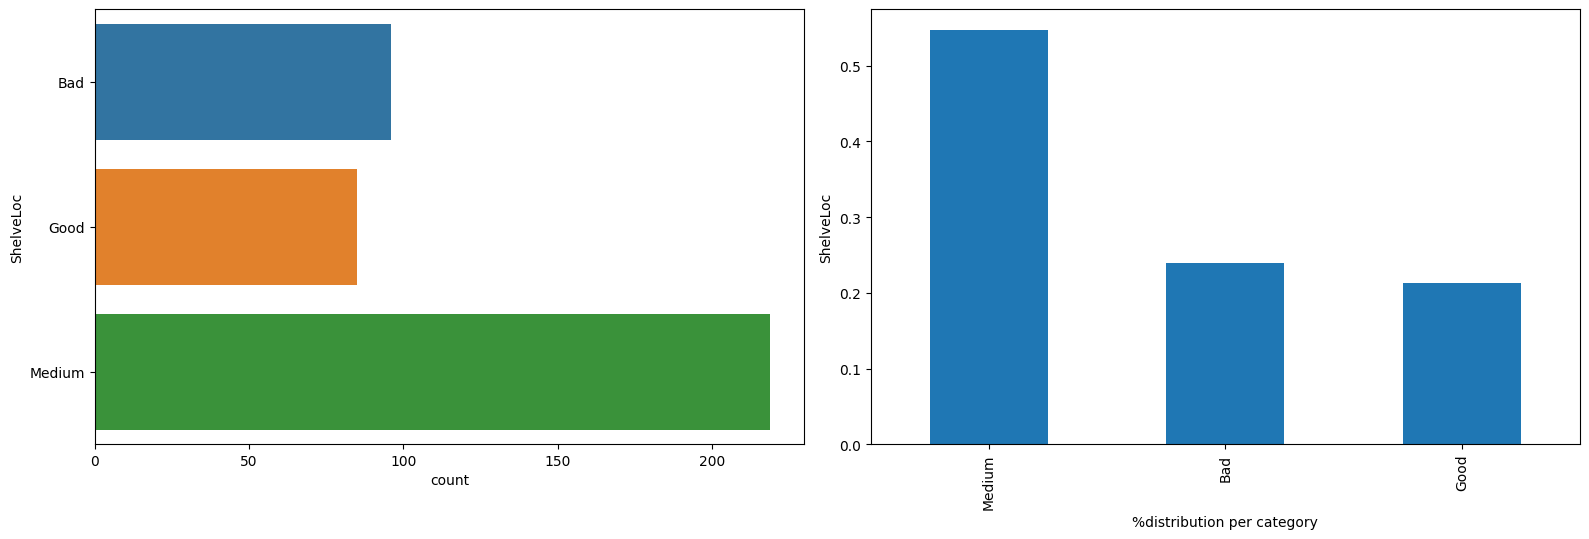

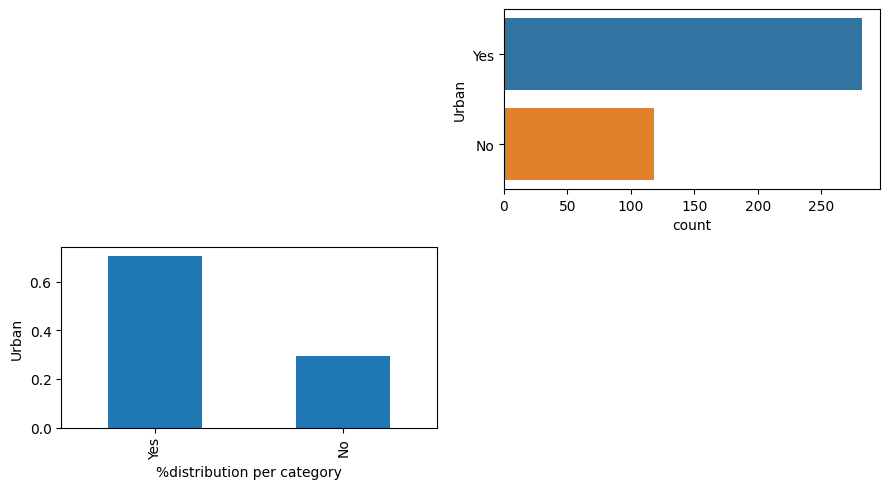

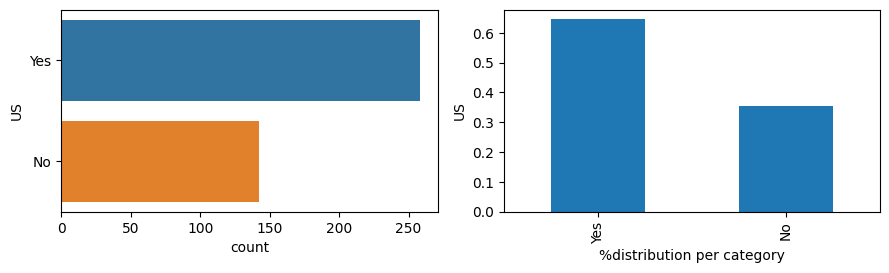

In [13]:
plt.figure(figsize=(16,10))
for i,col in enumerate(colu,1):
    plt.subplot(2,2,i)
    sns.countplot(data=comp1,y=col)
    plt.subplot(2,2,i+1)
    comp1[col].value_counts(normalize=True).plot.bar()
    plt.xlabel('%distribution per category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## This shows The Higher Sales causes at Medium quality of the shelving location for the car seats

## Urban:A factor with levels No and Yes to indicate whether the store is in an Urban or Rural location.
## From above plot we conclude that Higher Sales caused in Urban location.

## US:A factor with levels No and Yes to indicate whether the store is in the US or not.

## From above plot we conclude that Higher Sales caused in US.

In [14]:
ncolu=comp1.select_dtypes(exclude='object').columns.tolist()

C:\Users\91832\AppData\Local\Temp\ipykernel_13628\134937138.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comp[col],color='teal',shade=True)
C:\Users\91832\AppData\Local\Temp\ipykernel_13628\134937138.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comp[col],color='teal',shade=True)
C:\Users\91832\AppData\Local\Temp\ipykernel_13628\134937138.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comp[col],color='teal',shade=True)
C:\Users\91832\AppData\Local\Temp\ipykernel_13628\134937138.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn 

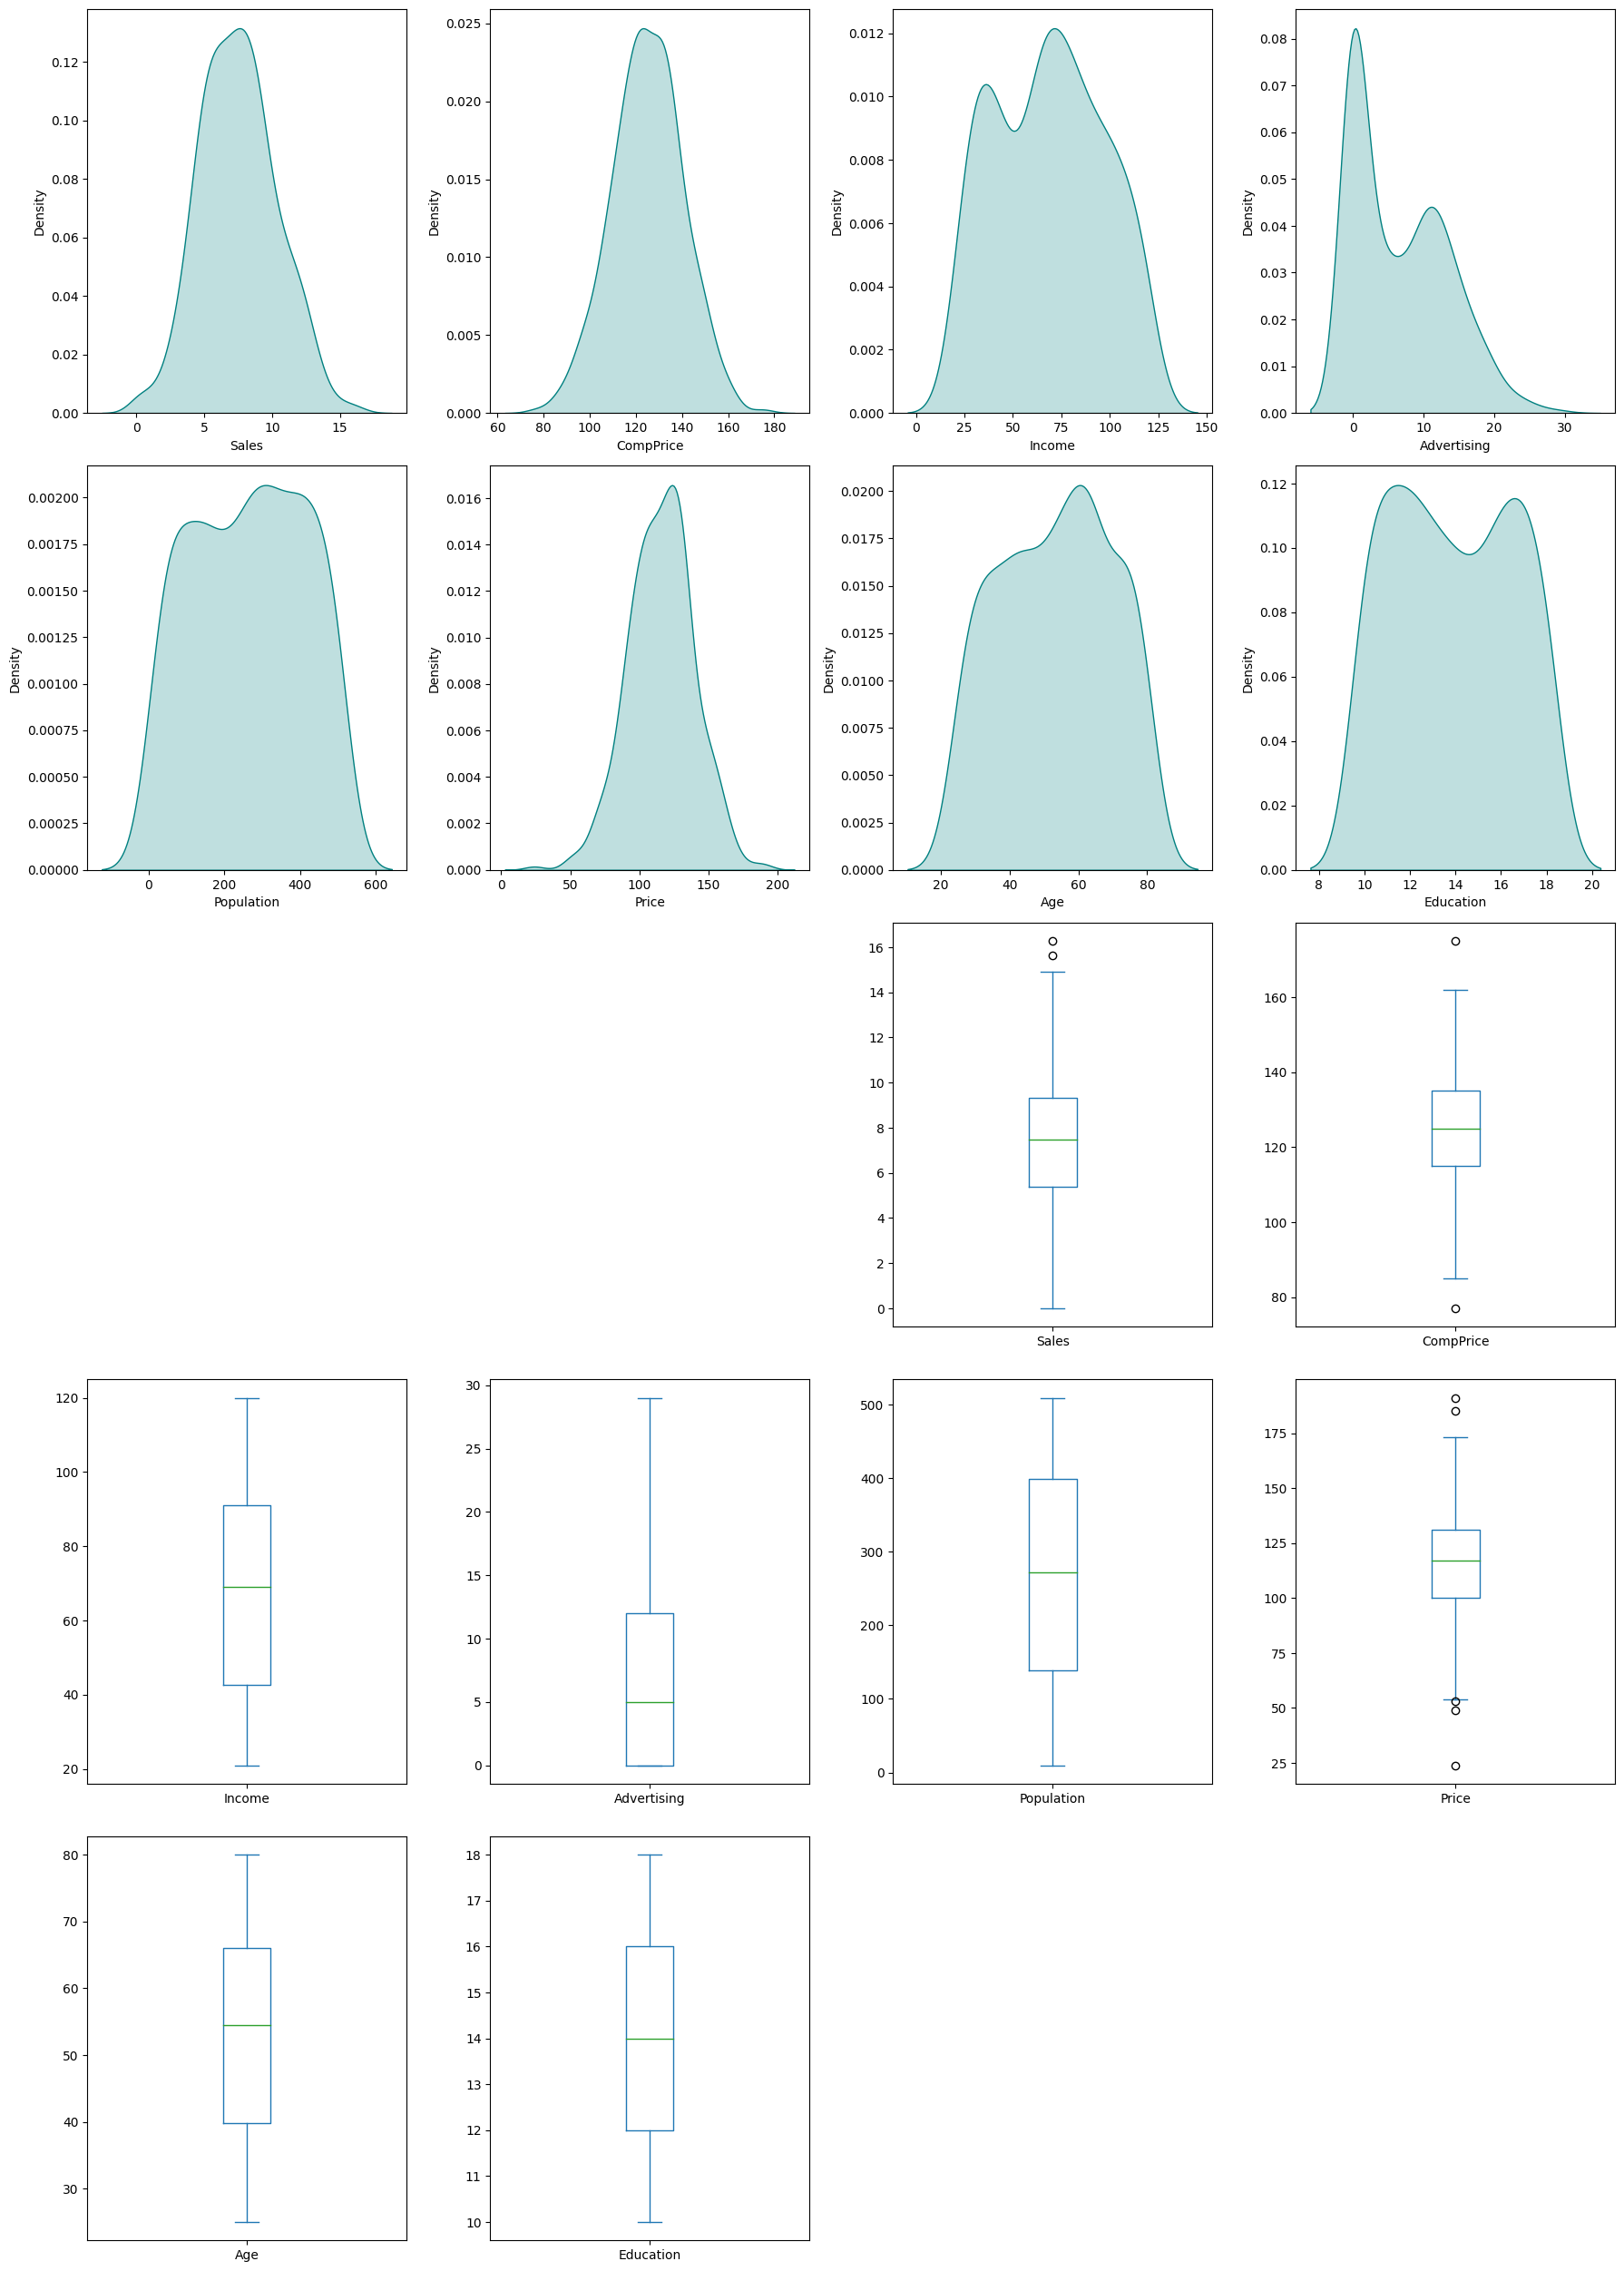

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [15]:
plt.figure(figsize=(18,40))
for i,col in enumerate(ncolu,1):
    plt.subplot(8,4,i)
    sns.kdeplot(comp[col],color='teal',shade=True)
    plt.subplot(8,4,i+10)
    comp[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = comp[ncolu]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


The distribution of segment population is widely distributed over all other segments.

In [16]:
corr=comp1.corr()

In [17]:
comp1=pd.get_dummies(comp1,columns=['ShelveLoc','Urban','US'])

In [18]:
corr=comp1.corr()

<AxesSubplot:>

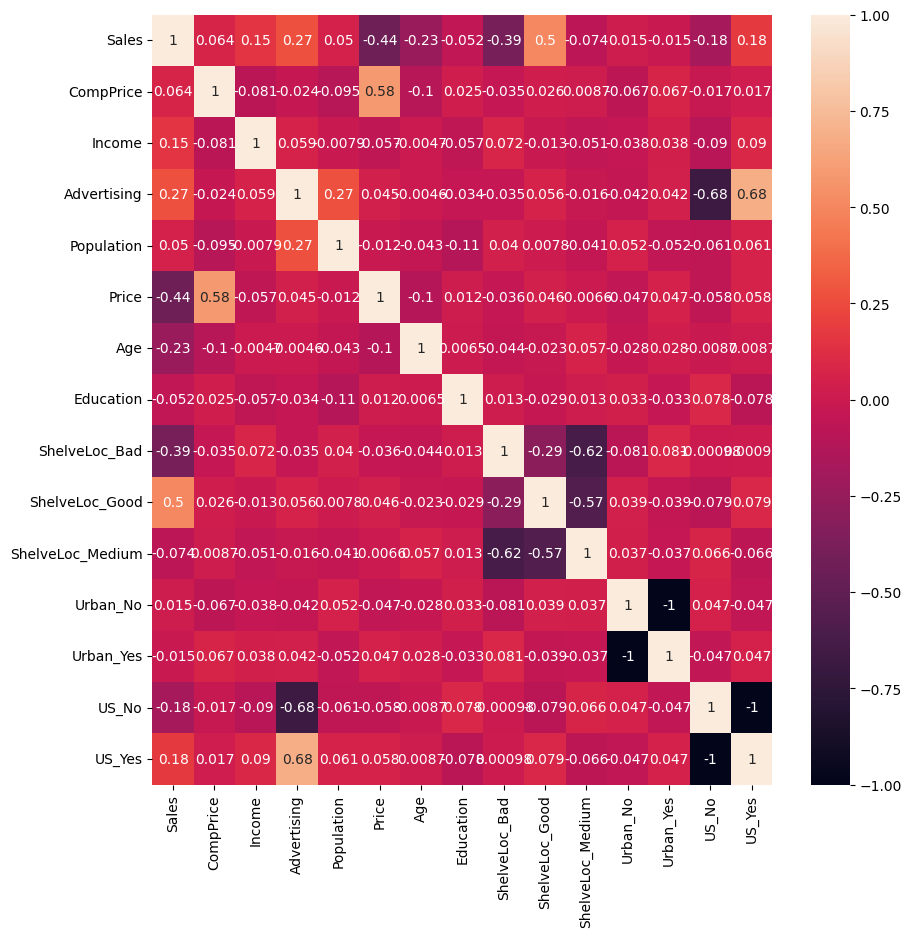

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## Decision Tree Model

### Since the target variable is continious, we create a class of the value based on the mean
### <= 7.49 == "Small" and > 7.49 == "large"

In [20]:
comp1["sales"]="small"
comp1.loc[comp1["Sales"]>7.49,"sales"]="large"
comp1.drop(["Sales"],axis=1,inplace=True)

In [21]:
x=comp1.iloc[:,0:14]
y=comp1.iloc[:,14]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)


In [23]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

## Building Decision Tree Classifier using Entropy Criteria

In [24]:
model=DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
ptrain=model.predict(x_train)

In [26]:
accuracy_score(y_train,ptrain)

1.0

In [27]:
confusion_matrix(y_train,ptrain)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [28]:
ptest=model.predict(x_test)

In [29]:
accuracy_score(y_test,ptest)

0.7125

In [30]:
confusion_matrix(y_test,ptest)

array([[28, 12],
       [11, 29]], dtype=int64)

In [31]:
dft=pd.DataFrame({'Actual':y_test,'Predicted':ptest})
dft

,Actual,Predicted
311,small,large
91,small,small
123,large,small
358,small,large
387,large,large
...,...,...
335,small,small
10,large,large
45,small,small
58,small,small


In [32]:
cols=list(comp1.columns)

In [33]:
predictors =cols[0:14]
target=cols[14]


In [34]:
d_data = StringIO()

In [35]:
export_graphviz(model,out_file = d_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )


## conclusion:-
## Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%

## As seen in the confusion matrix of Test data 56 instances are presdected correctly and 24 instances are not

In [36]:
model.feature_importances_

array([0.2309026 , 0.05005582, 0.11676703, 0.03513946, 0.26695252,
       0.09710261, 0.0636486 , 0.        , 0.10493823, 0.00656226,
       0.        , 0.02793087, 0.        , 0.        ])

In [37]:
fi=pd.DataFrame({'feature':list(x_train.columns),
                'importance':model.feature_importances_}).\
sort_values('importance',ascending=False)

In [38]:
fi

,feature,importance
4,Price,0.266953
0,CompPrice,0.230903
2,Advertising,0.116767
8,ShelveLoc_Good,0.104938
5,Age,0.097103
6,Education,0.063649
1,Income,0.050056
3,Population,0.035139
11,Urban_Yes,0.027931
9,ShelveLoc_Medium,0.006562


## As seen in the above table Price is most important feature

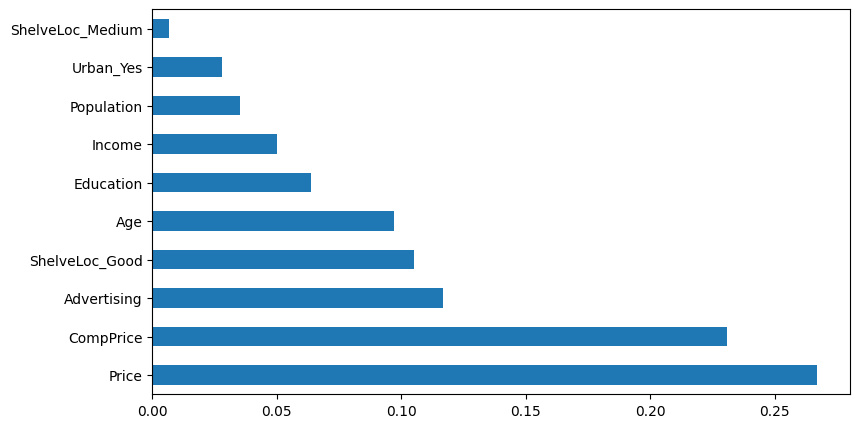

In [39]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Q2. Fraud check

In [40]:
frau=pd.read_csv('Fraud_check.csv')

In [41]:
frau1=frau.copy()
frau.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [42]:
frau1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [43]:
frau1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [44]:
frau1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## outlier check

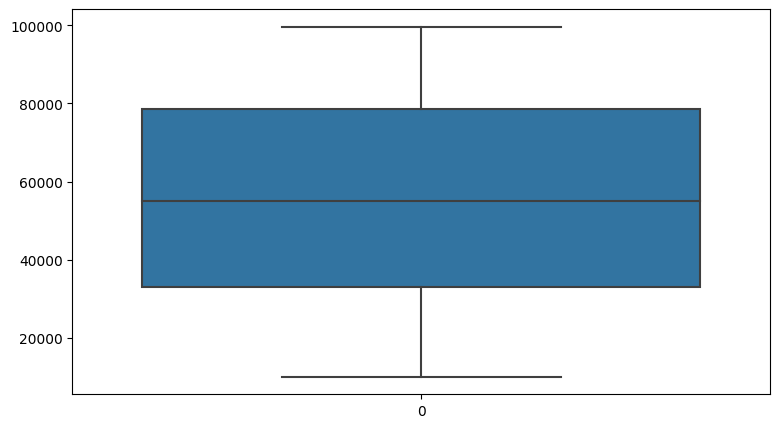

In [45]:
ax=sns.boxplot(frau1['Taxable.Income'])

## There are no outliers in the data

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


C:\Users\91832\AppData\Local\Temp\ipykernel_13628\745378463.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ab=sns.kdeplot(frau1['Taxable.Income'],shade=True,color='teal')


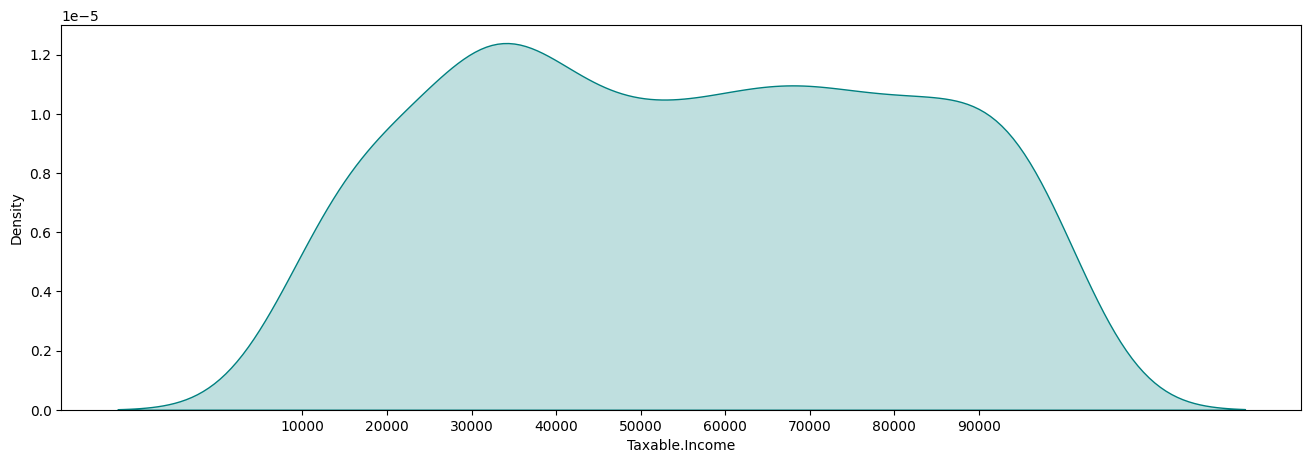

In [46]:
plt.rcParams["figure.figsize"]=9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(frau1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(frau1['Taxable.Income'].kurtosis()))
ab=sns.kdeplot(frau1['Taxable.Income'],shade=True,color='teal')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

## (1).The data is Skwed on the right 
## (2).The data has negative Kurtosis

In [47]:
ocolum=frau1.select_dtypes(include='object').columns.tolist()

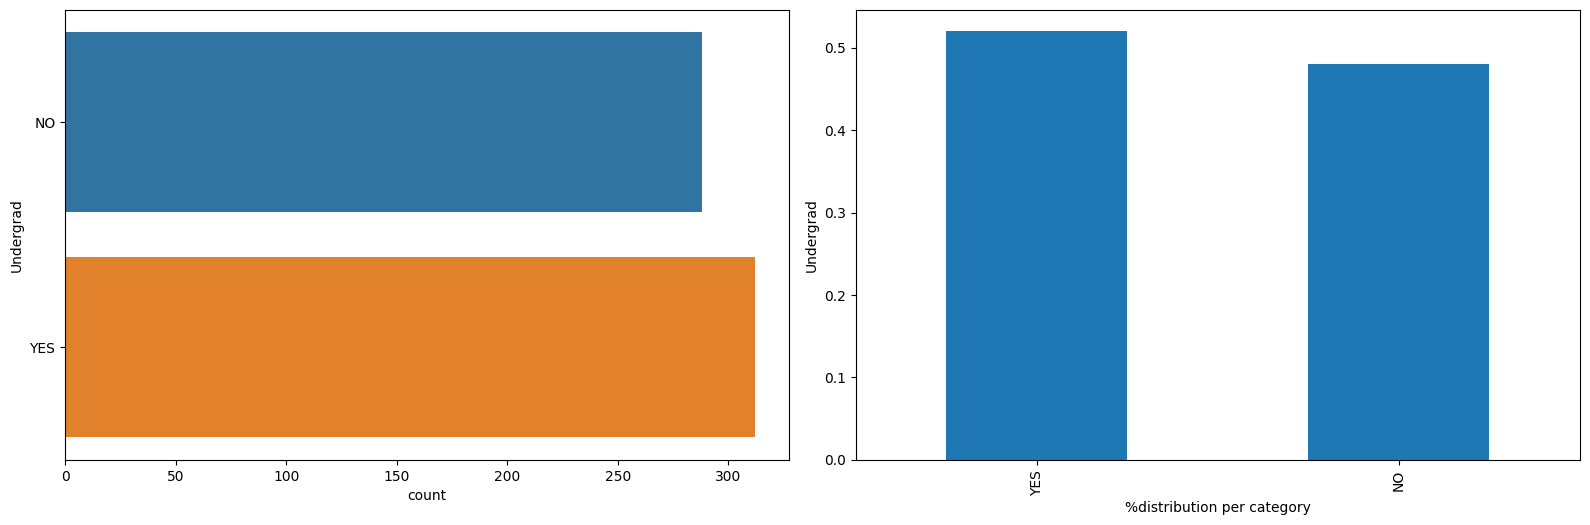

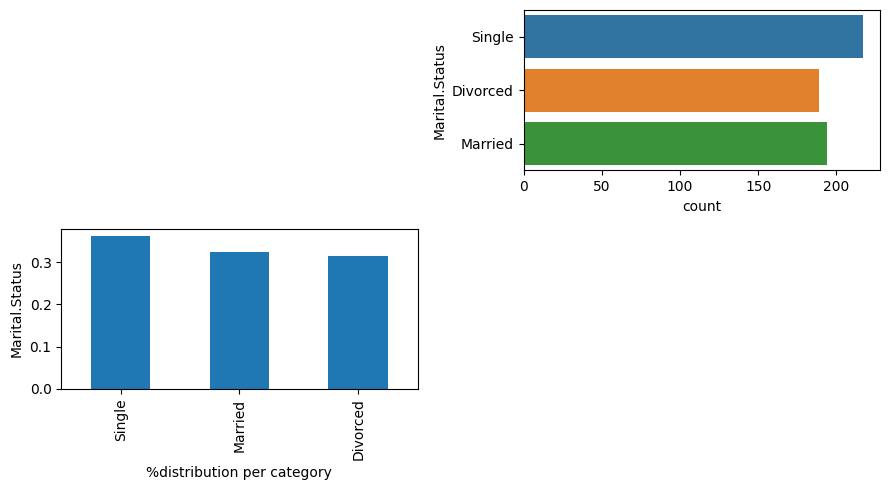

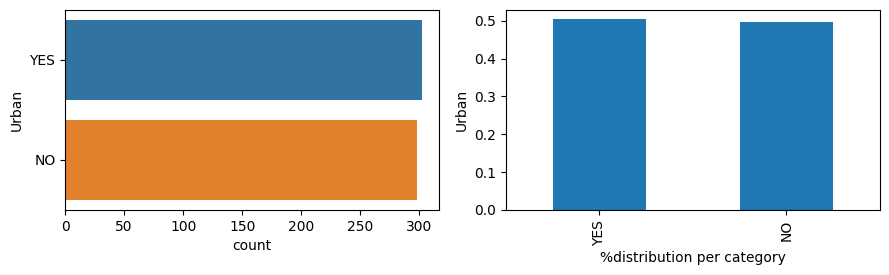

In [48]:
plt.figure(figsize=(16,10))
for i,col in enumerate(ocolum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=frau1,y=col)
    plt.subplot(2,2,i+1)
    frau1[col].value_counts(normalize=True).plot.bar()
    plt.xlabel('%distribution per category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [49]:
necol=frau1.select_dtypes(exclude='object').columns.tolist()

C:\Users\91832\AppData\Local\Temp\ipykernel_13628\1591486685.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(frau[col],color='teal',shade=True)


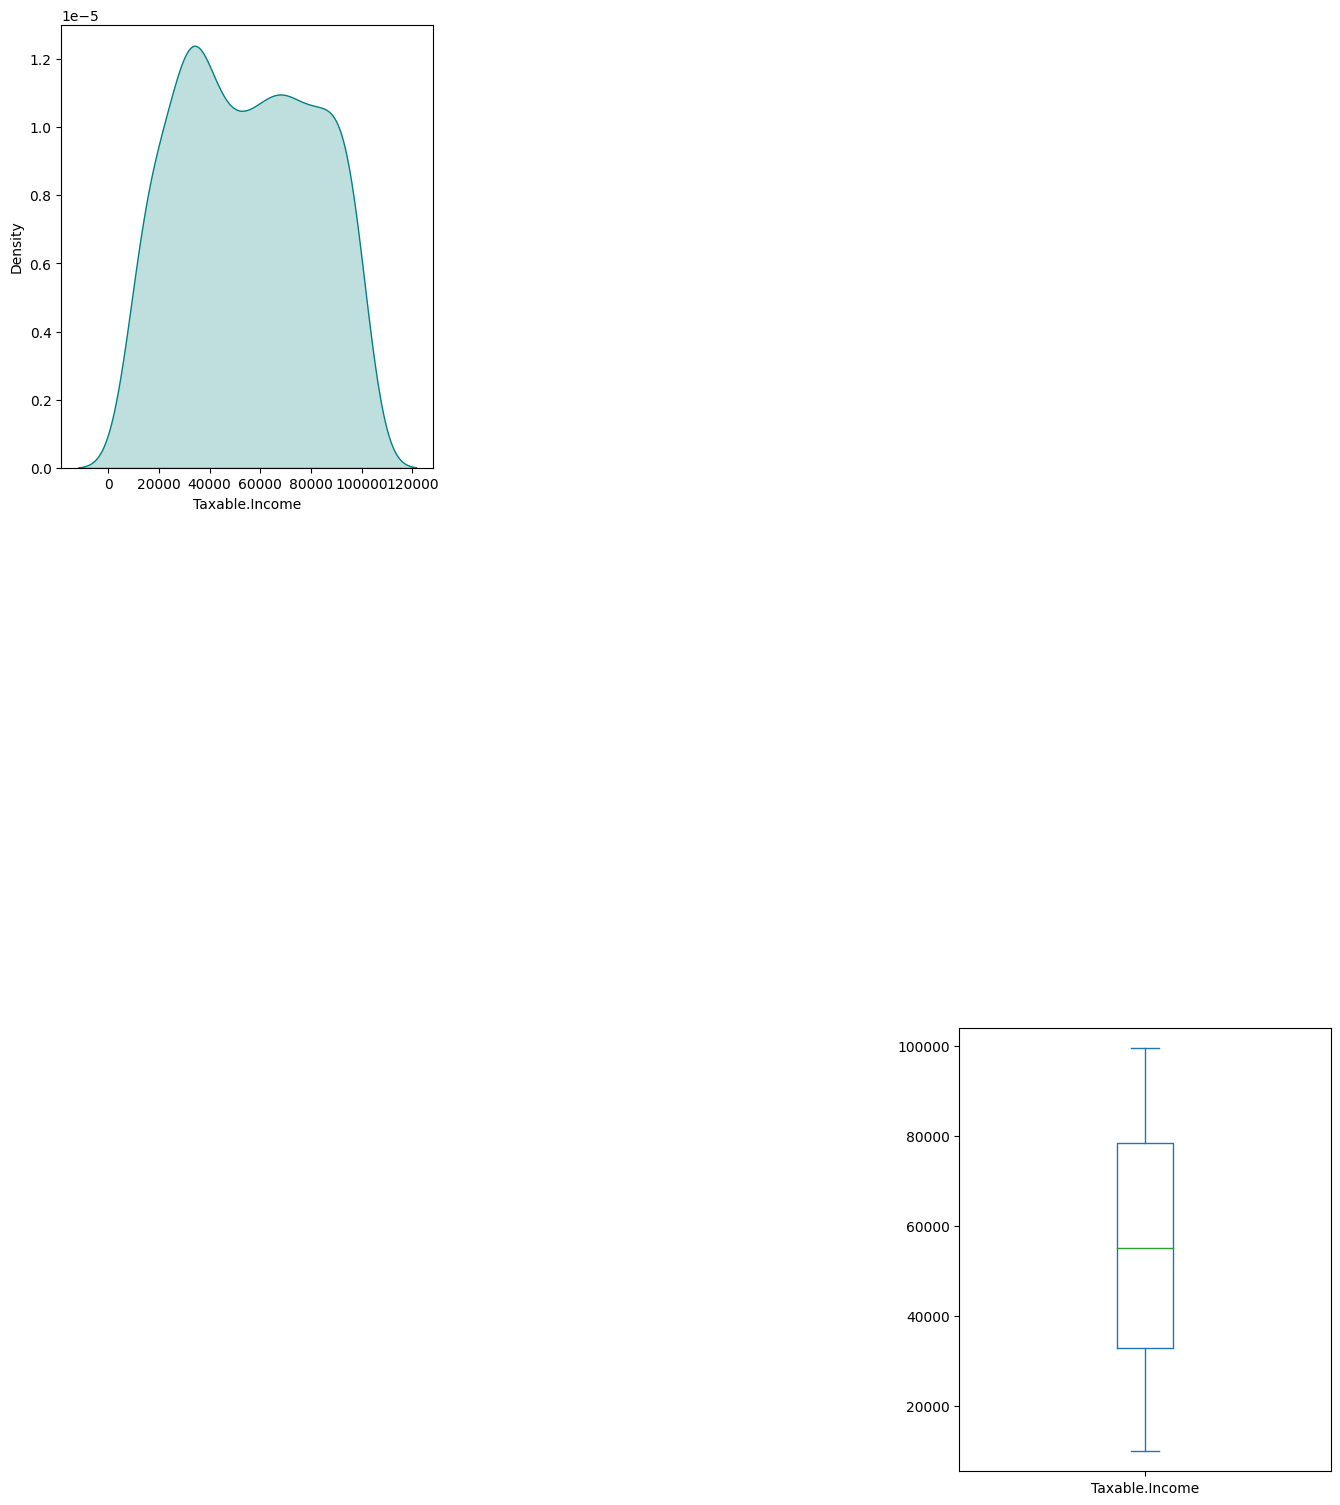

C:\Users\91832\AppData\Local\Temp\ipykernel_13628\1591486685.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(frau[col],color='teal',shade=True)


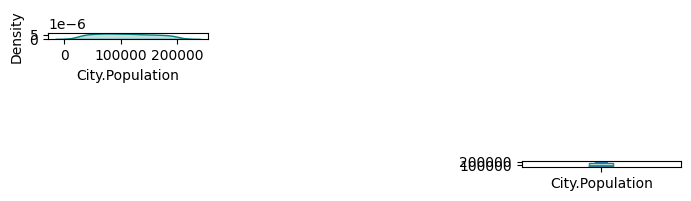

C:\Users\91832\AppData\Local\Temp\ipykernel_13628\1591486685.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(frau[col],color='teal',shade=True)


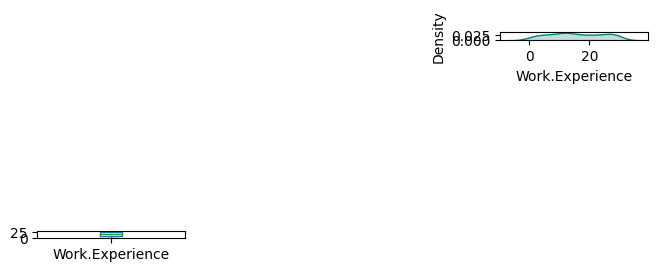

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [50]:
plt.figure(figsize=(18,40))
for i,col in enumerate(necol,1):
    plt.subplot(8,4,i)
    sns.kdeplot(frau[col],color='teal',shade=True)
    plt.subplot(8,4,i+10)
    frau[col].plot.box()
    plt.tight_layout()
    plt.show()
    nu_data=frau[necol]
pd.DataFrame(data=[nu_data.skew(),nu_data.kurtosis()],index=['skewness','kurtosis'])


In [51]:
frau1=pd.get_dummies(frau1,columns=['Undergrad','Marital.Status','Urban'])

In [52]:
corr=frau1.corr()

<AxesSubplot:>

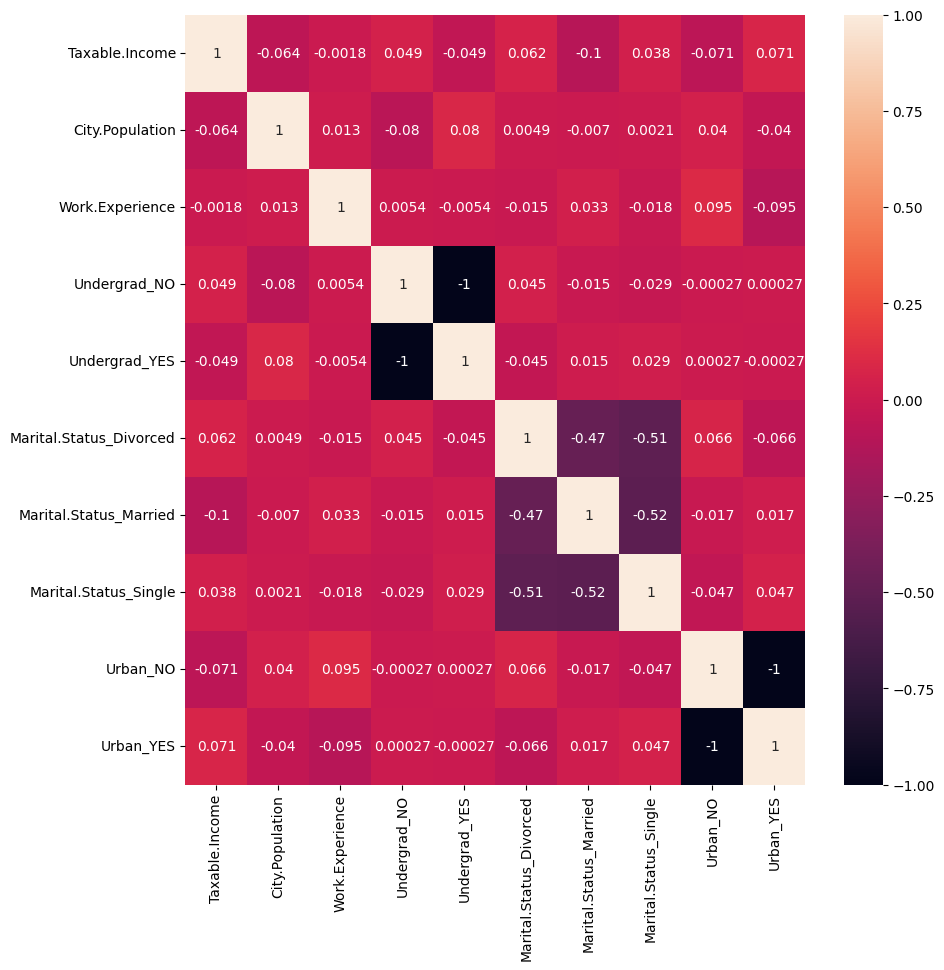

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## Decision Tree

## Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [54]:
frau1['Taxable.Income']=pd.cut(frau1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [55]:
list(frau1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [56]:
X=frau1.iloc[:,1:10]
y=frau1.iloc[:,0]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [58]:
y_train.value_counts()

good     385
risky     95
Name: Taxable.Income, dtype: int64

In [59]:
model1=DT(criterion='entropy')
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [60]:
prin=model1.predict(x_train)

In [61]:
accuracy_score(y_train,prin)

1.0

In [62]:
confusion_matrix(y_train,prin)

array([[385,   0],
       [  0,  95]], dtype=int64)

In [63]:
prst=model1.predict(x_test)

In [64]:
accuracy_score(y_test,prst)

0.5666666666666667

In [65]:
confusion_matrix(y_test,prst)

array([[66, 25],
       [27,  2]], dtype=int64)

In [66]:
dft1=pd.DataFrame({'Actual':y_test,'Predicted':prst})

In [67]:
dft1

,Actual,Predicted
179,risky,good
76,good,risky
303,good,good
585,good,good
191,good,risky
...,...,...
554,good,good
357,risky,good
93,risky,good
394,good,good


In [68]:
col=list(frau1.columns)

In [69]:
predic=col[1:10]
targ=col[0]

In [70]:
do_data=StringIO()

In [71]:
export_graphviz(model1, out_file = do_data ,filled = True,rounded =True,feature_names = predic,class_names = targ, impurity = False)

## conclusion:-
## Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 69%

## As seen in the confusion matrix of Test data 82 instances are presdected correctly and 38 instances are not 

In [72]:
model1.feature_importances_

array([0.58218639, 0.23774434, 0.02034424, 0.0403263 , 0.012798  ,
       0.03834416, 0.02446907, 0.0222865 , 0.02150101])

In [73]:
fy = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)
fy

,feature,importance
0,City.Population,0.582186
1,Work.Experience,0.237744
3,Undergrad_YES,0.040326
5,Marital.Status_Married,0.038344
6,Marital.Status_Single,0.024469
7,Urban_NO,0.022286
8,Urban_YES,0.021501
2,Undergrad_NO,0.020344
4,Marital.Status_Divorced,0.012798
